In [19]:
import csv
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from PIL import Image
import os
import math
import threading
import cv2
import base64
import elasticsearch
from elasticsearch import Elasticsearch,client ,helpers
es = Elasticsearch()
inp = tf.placeholder(tf.float32)
out = tf.cast(inp,tf.float16)

In [9]:
%%time
# names = []
for i in range(32):
    searchResult = es.search(
                    size =32,
                    index="open_image",
                    body={'query':{"match_all":{}}})
    imgs = []
    for result in searchResult['hits']['hits']:
#         names.append(result['_source']['id '])
#         reconstructed = base64.b64decode(result['_source']['image'])
#         img = cv2.imdecode(np.fromstring(reconstructed,dtype=np.uint8),1)
#         img = cv2.resize(img,(800,800))
#         imgs.append(img)
#     imgs = np.array(imgs,dtype=np.float32)
#     with tf.Session() as sess:
#         _ = sess.run([out],feed_dict={inp:imgs})

CPU times: user 1.31 s, sys: 202 ms, total: 1.51 s
Wall time: 3.4 s


In [21]:
len(names)

1024

In [26]:
%%time
head = {"index":"open_image"}
requests = []
for i in names:
    query={'query':{
        'match_phrase':{
            "id":{
                "query":i
            }
        }
    }}
    requests.extend([head,query])
print(len(requests))
# imgs = []
results = es.msearch(body=requests)
# for a in results['responses']:
#     for result in a['hits']['hits']:    
#         names.append(result['_source']['id '])
#         reconstructed = base64.b64decode(result['_source']['image'])
#         img = cv2.imdecode(np.fromstring(reconstructed,dtype=np.uint8),1)
#         img = cv2.resize(img,(800,800))
#         imgs.append(img)
# print(len(imgs))
# imgs = np.array(imgs,dtype=np.float32)
# with tf.Session() as sess:
#     _ = sess.run([out],feed_dict={inp:imgs})

2048
CPU times: user 31.1 ms, sys: 7.5 ms, total: 38.6 ms
Wall time: 645 ms


In [28]:
names

['d4f4d3574be84c6f',
 '89a55dde562341f4',
 'f4d0107d198425e5',
 '0f0596b1c511e071',
 '4301355eac25de79',
 '5d7b650efae831f9',
 '72b20f62bfca7671',
 'cff837a6eb1fc4cb',
 'c26a9d7d2db1d5b1',
 '6057b8dde1cc1d93',
 'd7f4db2d0f0739da',
 '7e4a5d5953ce7b00',
 '00d2a568dd4afd0d',
 '2b4dbd4b663d87ea',
 '1f34454c4c073e1b',
 'f8900ba13b8ebab5',
 '882baa60fef3affd',
 '55636241f3c80de7',
 'd412a5cd650c21e2',
 '6069a5676ee1e842',
 '0240e41bc74a1eaa',
 'e0ee278864042bc1',
 '31678f7cd472055a',
 'e5e277ddc85c291a',
 'dfa23a2577a22c8e',
 '04d9284ebdc41aeb',
 '6f4e39f1587d3a10',
 'f45f32d224aba2ea',
 'f6b8ef54f3bf12ee',
 'fb7b66717bc603cc',
 '741dac7d261bfa0c',
 'ccc18570ba287be1',
 'd4f4d3574be84c6f',
 '89a55dde562341f4',
 'f4d0107d198425e5',
 '0f0596b1c511e071',
 '4301355eac25de79',
 '5d7b650efae831f9',
 '72b20f62bfca7671',
 'cff837a6eb1fc4cb',
 'c26a9d7d2db1d5b1',
 '6057b8dde1cc1d93',
 'd7f4db2d0f0739da',
 '7e4a5d5953ce7b00',
 '00d2a568dd4afd0d',
 '2b4dbd4b663d87ea',
 '1f34454c4c073e1b',
 'f8900ba13b8

In [27]:
results

{'responses': [{'took': 204,
   'timed_out': False,
   '_shards': {'total': 15, 'successful': 15, 'skipped': 0, 'failed': 0},
   'hits': {'total': 0, 'max_score': None, 'hits': []},
   'status': 200},
  {'took': 3,
   'timed_out': False,
   '_shards': {'total': 15, 'successful': 15, 'skipped': 0, 'failed': 0},
   'hits': {'total': 0, 'max_score': None, 'hits': []},
   'status': 200},
  {'took': 2,
   'timed_out': False,
   '_shards': {'total': 15, 'successful': 15, 'skipped': 0, 'failed': 0},
   'hits': {'total': 0, 'max_score': None, 'hits': []},
   'status': 200},
  {'took': 1,
   'timed_out': False,
   '_shards': {'total': 15, 'successful': 15, 'skipped': 0, 'failed': 0},
   'hits': {'total': 0, 'max_score': None, 'hits': []},
   'status': 200},
  {'took': 1,
   'timed_out': False,
   '_shards': {'total': 15, 'successful': 15, 'skipped': 0, 'failed': 0},
   'hits': {'total': 0, 'max_score': None, 'hits': []},
   'status': 200},
  {'took': 1,
   'timed_out': False,
   '_shards': {'to

In [17]:
len(imgs)

0

In [3]:
reconstructed = base64.b64decode(result['_source']['image'])
img = cv2.imdecode(np.fromstring(reconstructed,dtype=np.uint8),1)

/home/lam/miniconda2/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


In [4]:
img.shape

(768, 1024, 3)

In [5]:
import matplotlib.pyplot as plt

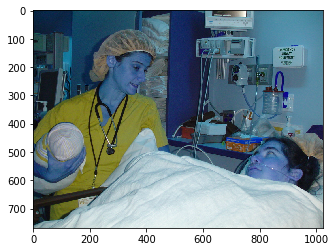

In [6]:
plt.imshow(img[:,:,:])